In [1]:
import pandas as pd
import json

In [113]:
df = pd.read_parquet('preped_dataset.parquet')

In [114]:
df

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
captured_at,,,,,,,,,,,,,,,,
2020-11-15 11:08:56.557755,238,4106,268,18896121,3366166653,282,50973,1,80.0,-1.0,0.00,1,0,1,1,1
2020-11-15 11:08:56.557921,238,4107,120,18896349,3366166653,134,50973,0,0.0,-1.0,0.00,0,0,0,0,0
2020-11-15 11:10:32.960528,238,4114,268,18981399,1200034468,282,50209,1,80.0,-1.0,0.00,1,0,1,1,1
2020-11-15 11:10:32.960651,238,4115,120,18981627,1200034468,134,50209,0,0.0,-1.0,0.00,0,0,0,0,0
2020-11-15 11:12:09.364875,238,4124,268,19066870,2455090346,282,50555,1,80.0,-1.0,0.00,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-22 19:06:25.088245,238,2141,61,3297622,1475074318,75,62211,0,0.0,-1.0,23.64,0,0,0,0,0
2020-11-22 19:08:02.100206,238,2157,474,3347818,134865517,488,62718,1,21.0,-1.0,0.00,0,1,1,1,1
2020-11-22 19:08:02.106091,238,2158,61,3348252,134865517,75,62718,0,0.0,-1.0,23.64,0,0,0,0,0


In [30]:
df.describe()

,ttl,identification,sequence_number,acknowledgment_number,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
count,16300.000000,16300.000000,1.630000e+04,1.630000e+04,16300.000000,16300.000000,16300.000000,16300.000000,16300.000000,16300.000000,16300.000000,16300.000000,16300.000000
mean,237.858896,11674.644908,1.937166e+08,2.151065e+09,0.500368,10.338773,-0.410374,8.079928,0.013067,0.487301,0.500368,0.500368,0.500368
std,0.348140,11534.097979,3.100617e+08,1.247805e+09,0.500015,12.613967,1.824246,10.589777,0.113567,0.499854,0.500015,0.500015,0.500015
min,237.000000,4.000000,6.510000e+03,9.355500e+05,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.000000,2372.000000,4.862166e+06,1.069852e+09,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,238.000000,7229.500000,3.710438e+07,2.145811e+09,1.000000,10.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,238.000000,18282.500000,2.389333e+08,3.238008e+09,1.000000,21.000000,-1.000000,18.450000,0.000000,1.000000,1.000000,1.000000,1.000000
max,238.000000,43723.000000,1.372878e+09,4.294678e+09,1.000000,80.000000,7.700000,31.110000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
normalization_value = {}

def normalize_column(df, col):
    _min = df[col].min()
    aux = df[col] - _min
    _max = aux.max()
    normalization_value[col] = {'min': _min, 'max': _max}
    return aux / _max

In [32]:
for col in ['ttl', 'identification', 'sequence_number', 'acknowledgment_number', 'header_content_length',
            'payload_speed', 'payload_temperatura', 'total_length', 'original_length', 'source_port']:
    df[col] = df[col].map(float)
    df[col] = normalize_column(df, col)

In [33]:
normalization_value

{'ttl': {'min': 237.0, 'max': 1.0},
 'identification': {'min': 4.0, 'max': 43719.0},
 'sequence_number': {'min': 6510.0, 'max': 1372871789.0},
 'acknowledgment_number': {'min': 935550.0, 'max': 4293742307.0},
 'header_content_length': {'min': 0.0, 'max': 80.0},
 'payload_speed': {'min': -1.0, 'max': 8.7},
 'payload_temperatura': {'min': 0.0, 'max': 31.11},
 'total_length': {'min': 53.0, 'max': 421.0},
 'original_length': {'min': 67.0, 'max': 421.0},
 'source_port': {'min': 5120.0, 'max': 60412.0}}

In [35]:
df['payload_speed'] = df['payload_speed'].map(lambda v: -1 if v < 0 else v)

In [36]:
df

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
captured_at,,,,,,,,,,,,,,,,
2020-11-15 11:08:56.557755,1.0,0.093826,0.510689,0.013759,0.783752,0.510689,0.759005,1,1.0000,0.0,0.000000,1,0,1,1,1
2020-11-15 11:08:56.557921,1.0,0.093849,0.159145,0.013759,0.783752,0.159145,0.759005,0,0.0000,0.0,0.000000,0,0,0,0,0
2020-11-15 11:10:32.960528,1.0,0.094009,0.510689,0.013821,0.279267,0.510689,0.746358,1,1.0000,0.0,0.000000,1,0,1,1,1
2020-11-15 11:10:32.960651,1.0,0.094032,0.159145,0.013821,0.279267,0.159145,0.746358,0,0.0000,0.0,0.000000,0,0,0,0,0
2020-11-15 11:12:09.364875,1.0,0.094238,0.510689,0.013884,0.571565,0.510689,0.752086,1,1.0000,0.0,0.000000,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-22 19:06:25.088245,1.0,0.048880,0.019002,0.002397,0.343323,0.019002,0.945027,0,0.0000,0.0,0.759884,0,0,0,0,0
2020-11-22 19:08:02.100206,1.0,0.049246,1.000000,0.002434,0.031192,1.000000,0.953420,1,0.2625,0.0,0.000000,0,1,1,1,1
2020-11-22 19:08:02.106091,1.0,0.049269,0.019002,0.002434,0.031192,0.019002,0.953420,0,0.0000,0.0,0.759884,0,0,0,0,0


In [37]:
df.to_parquet('normalized_data.parquet')

In [39]:
with open('normalization_values.json', 'w+') as file:
    json.dump(normalization_value, file)

## Training

In [7]:
df = pd.read_parquet('normalized_data.parquet')

In [8]:
df

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
captured_at,,,,,,,,,,,,,,,,
2020-11-15 11:08:56.557755,1.0,0.093826,0.510689,0.013759,0.783752,0.510689,0.759005,1,1.0000,0.0,0.000000,1,0,1,1,1
2020-11-15 11:08:56.557921,1.0,0.093849,0.159145,0.013759,0.783752,0.159145,0.759005,0,0.0000,0.0,0.000000,0,0,0,0,0
2020-11-15 11:10:32.960528,1.0,0.094009,0.510689,0.013821,0.279267,0.510689,0.746358,1,1.0000,0.0,0.000000,1,0,1,1,1
2020-11-15 11:10:32.960651,1.0,0.094032,0.159145,0.013821,0.279267,0.159145,0.746358,0,0.0000,0.0,0.000000,0,0,0,0,0
2020-11-15 11:12:09.364875,1.0,0.094238,0.510689,0.013884,0.571565,0.510689,0.752086,1,1.0000,0.0,0.000000,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-22 19:06:25.088245,1.0,0.048880,0.019002,0.002397,0.343323,0.019002,0.945027,0,0.0000,0.0,0.759884,0,0,0,0,0
2020-11-22 19:08:02.100206,1.0,0.049246,1.000000,0.002434,0.031192,1.000000,0.953420,1,0.2625,0.0,0.000000,0,1,1,1,1
2020-11-22 19:08:02.106091,1.0,0.049269,0.019002,0.002434,0.031192,0.019002,0.953420,0,0.0000,0.0,0.759884,0,0,0,0,0


In [59]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Reshape
from keras.regularizers import L1L2
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling

%matplotlib inline

In [10]:
y = np.zeros(len(df))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4, random_state=42)

In [42]:
X_train

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
captured_at,,,,,,,,,,,,,,,,
2020-11-17 18:37:58.014021,1.0,0.071731,1.000000,0.007740,0.523700,1.000000,0.000447,1,0.1625,0.000000,0.00000,0,1,1,1,1
2020-11-20 07:29:27.966420,1.0,0.257714,0.011876,0.066368,0.401070,0.011876,0.951119,0,0.0000,0.000000,0.48216,0,0,0,0,0
2020-11-19 15:30:53.505629,1.0,0.031359,1.000000,0.001455,0.984081,1.000000,0.082831,1,0.1625,0.000000,0.00000,0,1,1,1,1
2020-11-16 08:03:28.451569,1.0,0.237014,1.000000,0.056462,0.913420,1.000000,0.762249,1,0.2625,0.000000,0.00000,0,1,1,1,1
2020-11-20 20:22:41.777031,1.0,0.436629,1.000000,0.190331,0.032724,1.000000,0.943654,1,0.2625,0.000000,0.00000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-21 04:31:30.890221,1.0,0.550173,1.000000,0.302328,0.495814,1.000000,0.949149,1,0.2625,0.000000,0.00000,0,1,1,1,1
2020-11-17 19:25:39.659739,1.0,0.151627,1.000000,0.022089,0.016203,1.000000,0.949414,1,0.2500,0.000000,0.00000,0,1,1,1,1
2020-11-15 22:13:15.252633,1.0,0.100483,1.000000,0.010142,0.643198,1.000000,0.865656,1,0.2500,0.000000,0.00000,0,1,1,1,1


In [43]:
X_train.shape

(9780, 16)

In [45]:
generator = Sequential()
generator.add(InputLayer(input_shape=(100,)))
generator.add(Dense(units=100, input_dim=100, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
generator.add(Dense(units=100, input_dim=100, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
generator.add(Dense(units=16, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
generator.add(Reshape((16,)))

In [46]:
discrim = Sequential()
discrim.add(InputLayer(input_shape=(16,)))
discrim.add(Dense(units=100, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
discrim.add(Dense(units=100, activation='relu', kernel_regularizer=L1L2(1e-5, 1e-5)))
discrim.add(Dense(units=1, activation='sigmoid', kernel_regularizer=L1L2(1e-5, 1e-5)))

In [47]:
gan = simple_gan(generator, discrim, normal_latent_sampling((100,)))

In [48]:
model = AdversarialModel(base_model=gan, player_params=[generator.trainable_weights, discrim.trainable_weights])

In [49]:
model.adversarial_compile(adversarial_optimizer=AdversarialOptimizerSimultaneous(),
                          player_optimizers=['adam', 'adam'], loss='binary_crossentropy')

In [51]:
model.fit(x=X_train, y=gan_targets(9780), epochs=100, batch_size=256)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Epoch 1/100






9780/9780 [==============================] - 2s 201us/step - loss: 3.4848 - player_0_loss: 2.0792 - player_0_yfake_loss: 0.9400 - player_0_yreal_loss: 0.8980 - player_1_loss: 1.4055 - player_1_yfake_loss: 0.5946 - player_1_yreal_loss: 0.5697
Epoch 2/100
9780/9780 [==============================] - 0s 35us/step - loss: 4.0575 - player_0_loss: 2.6710 - player_0_yfake_loss: 1.7854 - player_0_yreal_loss: 0.6586 - player_1_loss: 1.3865 - player_1_yfake_loss: 0.2491 - player_1_yreal_loss: 0.9104
Epoch 3/100
9780/9780 [==============================] - 0s 43us/step - loss: 4.9597 - player_0_loss: 4.1058 - player_0_yfake_loss: 1.5696 - player_0_yreal_loss: 2.3213 - player_1_loss: 0.8539 - player_1_yfake_loss: 0.4677 - player_1_yreal_loss: 0.1712
Epoch 4/100
9780/9780 [==============================] - 0s 38us/step - loss: 5.0998 - player_0_loss: 4.4711 - pla

9780/9780 [==============================] - 0s 33us/step - loss: 8.1826 - player_0_loss: 7.5446 - player_0_yfake_loss: 2.1238 - player_0_yreal_loss: 5.2247 - player_1_loss: 0.6380 - player_1_yfake_loss: 0.1660 - player_1_yreal_loss: 0.2759
Epoch 26/100
9780/9780 [==============================] - 0s 24us/step - loss: 8.2330 - player_0_loss: 7.6384 - player_0_yfake_loss: 2.1335 - player_0_yreal_loss: 5.3080 - player_1_loss: 0.5946 - player_1_yfake_loss: 0.1895 - player_1_yreal_loss: 0.2082
Epoch 27/100
9780/9780 [==============================] - 0s 24us/step - loss: 10.9157 - player_0_loss: 10.3823 - player_0_yfake_loss: 2.3117 - player_0_yreal_loss: 7.8732 - player_1_loss: 0.5333 - player_1_yfake_loss: 0.1208 - player_1_yreal_loss: 0.2150
Epoch 28/100
9780/9780 [==============================] - 0s 30us/step - loss: 12.7134 - player_0_loss: 12.1998 - player_0_yfake_loss: 2.6965 - player_0_yreal_loss: 9.3069 - player_1_loss: 0.5136 - player_1_yfake_loss: 0.0907 - player_1_yreal_loss: 

9780/9780 [==============================] - 0s 34us/step - loss: 16.7096 - player_0_loss: 16.4123 - player_0_yfake_loss: 3.2485 - player_0_yreal_loss: 12.9870 - player_1_loss: 0.2973 - player_1_yfake_loss: 0.0460 - player_1_yreal_loss: 0.0744
Epoch 58/100
9780/9780 [==============================] - 0s 29us/step - loss: 17.2598 - player_0_loss: 17.0111 - player_0_yfake_loss: 3.5836 - player_0_yreal_loss: 13.2512 - player_1_loss: 0.2486 - player_1_yfake_loss: 0.0318 - player_1_yreal_loss: 0.0405
Epoch 59/100
9780/9780 [==============================] - 0s 44us/step - loss: 17.2232 - player_0_loss: 16.9427 - player_0_yfake_loss: 3.4067 - player_0_yreal_loss: 13.3605 - player_1_loss: 0.2804 - player_1_yfake_loss: 0.0385 - player_1_yreal_loss: 0.0664
Epoch 60/100
9780/9780 [==============================] - 0s 45us/step - loss: 18.8844 - player_0_loss: 18.6450 - player_0_yfake_loss: 4.2691 - player_0_yreal_loss: 14.2008 - player_1_loss: 0.2394 - player_1_yfake_loss: 0.0211 - player_1_yrea

9780/9780 [==============================] - 0s 37us/step - loss: 18.2603 - player_0_loss: 18.0265 - player_0_yfake_loss: 3.6099 - player_0_yreal_loss: 14.2746 - player_1_loss: 0.2339 - player_1_yfake_loss: 0.0293 - player_1_yreal_loss: 0.0625
Epoch 89/100
9780/9780 [==============================] - 0s 37us/step - loss: 18.2198 - player_0_loss: 17.9823 - player_0_yfake_loss: 3.5792 - player_0_yreal_loss: 14.2623 - player_1_loss: 0.2375 - player_1_yfake_loss: 0.0302 - player_1_yreal_loss: 0.0666
Epoch 90/100
9780/9780 [==============================] - 0s 31us/step - loss: 18.0477 - player_0_loss: 17.7879 - player_0_yfake_loss: 3.4649 - player_0_yreal_loss: 14.1840 - player_1_loss: 0.2598 - player_1_yfake_loss: 0.0345 - player_1_yreal_loss: 0.0863
Epoch 91/100
9780/9780 [==============================] - 0s 37us/step - loss: 17.8151 - player_0_loss: 17.5649 - player_0_yfake_loss: 3.3425 - player_0_yreal_loss: 14.0851 - player_1_loss: 0.2502 - player_1_yfake_loss: 0.0376 - player_1_yrea

---

### Testing

In [60]:
with open('normalization_values.json', 'r') as file:
    normalization_values = json.load(file)

In [63]:
cols = X_train.columns

In [61]:
normalization_values

{'ttl': {'min': 237.0, 'max': 1.0},
 'identification': {'min': 4.0, 'max': 43719.0},
 'sequence_number': {'min': 6510.0, 'max': 1372871789.0},
 'acknowledgment_number': {'min': 935550.0, 'max': 4293742307.0},
 'header_content_length': {'min': 0.0, 'max': 80.0},
 'payload_speed': {'min': -1.0, 'max': 8.7},
 'payload_temperatura': {'min': 0.0, 'max': 31.11},
 'total_length': {'min': 53.0, 'max': 421.0},
 'original_length': {'min': 67.0, 'max': 421.0},
 'source_port': {'min': 5120.0, 'max': 60412.0}}

In [73]:
boolean_cols = ['is_post', 'is_endpoint_signin', 'is_endpoint_message', 'is_esp8266_user_agent',
                'is_keep_alive', 'is_json']

In [86]:
def generate_rows(num=1):
    arr = generator.predict(np.random.normal(size=(num, 100)))
    return pd.DataFrame(arr, columns=cols)

In [80]:
def de_normalize_row(df):
    # return values to original ranges for analysis
    for column in normalization_values:
        df[column] *= normalization_values[column]['max']
        df[column] += normalization_values[column]['min']
        
    for column in boolean_cols:
        df[column] = df[column].map(lambda val: val > 0.5)
        
    return df

In [81]:
row = get_generated_row()
row

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
0,0.759005,0.0,0.0,0.0,1.169585,0.0,0.0,0.0,0.0,0.655611,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
de_normalize_row(row)

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
0,237.759003,4.0,53.0,6510.0,5.022833e+09,67.0,5120.0,False,0.0,4.703815,0.0,False,False,False,False,False


### Test discrimator

In [102]:
X_test

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
captured_at,,,,,,,,,,,,,,,,
2020-11-19 21:19:07.923800,1.0,0.097669,0.000000,0.014075,0.504980,0.000000,0.082947,0,0.0000,0.942529,0.000000,0,0,0,0,0
2020-11-17 18:46:50.373462,1.0,0.142684,1.000000,0.019509,0.072148,1.000000,0.950126,1,0.2500,0.000000,0.000000,0,1,1,1,1
2020-11-18 13:04:40.913568,1.0,0.006816,1.000000,0.000065,0.270993,1.000000,0.007730,1,0.1625,0.000000,0.000000,0,1,1,1,1
2020-11-16 06:40:55.587876,1.0,0.217914,0.011876,0.047683,0.794732,0.011876,0.736708,0,0.0000,0.000000,0.642880,0,0,0,0,0
2020-11-16 20:19:52.948528,1.0,0.091173,0.000000,0.012513,0.540940,0.000000,0.003791,0,0.0000,0.701149,0.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-21 23:10:04.161240,1.0,0.809008,1.000000,0.653993,0.425673,1.000000,0.949580,1,0.2625,0.000000,0.000000,0,1,1,1,1
2020-11-21 23:10:04.161340,1.0,0.809030,0.019002,0.653993,0.425673,0.019002,0.949580,0,0.0000,0.000000,0.556734,0,0,0,0,0
2020-11-19 13:29:04.115298,1.0,0.007800,0.019002,0.000059,0.159257,0.019002,0.947212,0,0.0000,0.000000,0.749920,0,0,0,0,0


In [90]:
res = discrim.predict(X_test)

In [97]:
res = [round(j) for i in res for j in i]

(array([ 131.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6389.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <BarContainer object of 10 artists>)

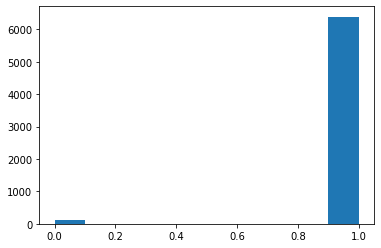

In [98]:
plt.hist(res)

In [93]:
len(res)

6520

In [99]:
len([i for i in res if i == 0])

131

In [101]:
(6520 - 131) / 6520

0.9799079754601226

98% precision in test set 

In [103]:
fake_test = generate_rows(6520)

In [104]:
fake_test

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
0,0.747314,0.0,0.0,0.0,0.806969,0.0,0.0,0.0,0.0,0.593652,0.0,0.0,0.0,0.0,0.0,0.0
1,0.739054,0.0,0.0,0.0,0.844973,0.0,0.0,0.0,0.0,0.593609,0.0,0.0,0.0,0.0,0.0,0.0
2,0.930283,0.0,0.0,0.0,0.543619,0.0,0.0,0.0,0.0,0.682124,0.0,0.0,0.0,0.0,0.0,0.0
3,0.942035,0.0,0.0,0.0,0.529917,0.0,0.0,0.0,0.0,0.688494,0.0,0.0,0.0,0.0,0.0,0.0
4,1.002504,0.0,0.0,0.0,0.461598,0.0,0.0,0.0,0.0,0.719454,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,1.071389,0.0,0.0,0.0,0.387105,0.0,0.0,0.0,0.0,0.751940,0.0,0.0,0.0,0.0,0.0,0.0
6516,0.768843,0.0,0.0,0.0,0.751516,0.0,0.0,0.0,0.0,0.601697,0.0,0.0,0.0,0.0,0.0,0.0
6517,0.739749,0.0,0.0,0.0,0.865063,0.0,0.0,0.0,0.0,0.597272,0.0,0.0,0.0,0.0,0.0,0.0
6518,0.767953,0.0,0.0,0.0,1.249706,0.0,0.0,0.0,0.0,0.673245,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
de_normalize_row(fake_test)

,ttl,identification,total_length,sequence_number,acknowledgment_number,original_length,source_port,is_post,header_content_length,payload_speed,payload_temperatura,is_endpoint_signin,is_endpoint_message,is_esp8266_user_agent,is_keep_alive,is_json
0,237.747314,4.0,53.0,6510.0,3.465852e+09,67.0,5120.0,False,0.0,4.164770,0.0,False,False,False,False,False
1,237.739059,4.0,53.0,6510.0,3.629033e+09,67.0,5120.0,False,0.0,4.164402,0.0,False,False,False,False,False
2,237.930283,4.0,53.0,6510.0,2.335094e+09,67.0,5120.0,False,0.0,4.934476,0.0,False,False,False,False,False
3,237.942032,4.0,53.0,6510.0,2.276264e+09,67.0,5120.0,False,0.0,4.989895,0.0,False,False,False,False,False
4,238.002502,4.0,53.0,6510.0,1.982916e+09,67.0,5120.0,False,0.0,5.259250,0.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,238.071396,4.0,53.0,6510.0,1.663065e+09,67.0,5120.0,False,0.0,5.541876,0.0,False,False,False,False,False
6516,237.768845,4.0,53.0,6510.0,3.227750e+09,67.0,5120.0,False,0.0,4.234760,0.0,False,False,False,False,False
6517,237.739746,4.0,53.0,6510.0,3.715293e+09,67.0,5120.0,False,0.0,4.196265,0.0,False,False,False,False,False
6518,237.767960,4.0,53.0,6510.0,5.366851e+09,67.0,5120.0,False,0.0,4.857231,0.0,False,False,False,False,False


In [105]:
res = discrim.predict(fake_test)

In [107]:
res

array([[0.02316067],
       [0.02306193],
       [0.02576077],
       ...,
       [0.02312925],
       [0.01472363],
       [0.02575612]], dtype=float32)

In [108]:
res = [round(j) for i in res for j in i]

(array([   0.,    0.,    0.,    0.,    0., 6520.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

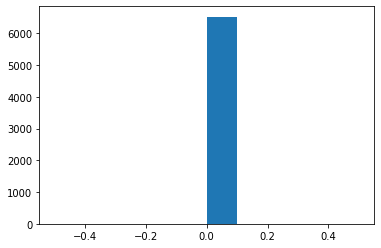

In [111]:
plt.hist(res)

In [110]:
len(res)

6520

In [109]:
len([i for i in res if i == 0])

6520

In [116]:
6520 * 2

13040

In [117]:
(13040 - 131) / 13040

0.9899539877300614

99%